In [10]:
import numpy as np
import pandas as pd

#### MNIST 데이터 준비

In [4]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True) 
mnist


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [30]:
X, y = mnist["data"], mnist["target"]
y = np.array(list(map(int, y)))


print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


3


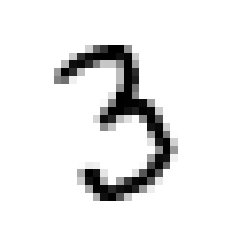

In [44]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print(y[30000])

some_digit = X[30000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
#cmap=matplotlib.cm.binary ==> binary 컬러맵으로 그리기
#interpolation="nearest" ==> 각 픽셀은 nearest 보간 방식으로 사용해서 결정한다(nearest 보간 방식 : 새로운 지점 또는 한 지점 값을 결정할 때 주변 분포한 값을 사용해 결정하는 것)
plt.axis("off")
plt.show()

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # 모든 교차 검증 폴드가 비슷해지도록 만들기 위해

#### 이진 분류기 훈련

In [46]:
y_train_3 =(y_train==3)
y_test_3 = (y_test==3)

In [49]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
#max_iter=5 는 최대로 통과할 수 있는 데이터의 수가 5
sgd_clf.fit(X_train, y_train_3)

sgd_clf.predict([some_digit])

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([ True])

#### 성능 측정

1. 교차 검증

폴드가 3개인 K-겹 교차 검증 사용해 SGDClassifier 모델 평가해 보았는데, 모든 교차 검증 폴드에 대해 정확도가 95% 이상이다. 그러나 이는, 전체 이미지의 10%정도 숫자만 3이기 때문에 모든 숫자를 모두 3이 아니라고 예측해도 정확도가 90%이다.

이 데이터의 경우는, (특히 불균형한 데이터셋을 다룰 때) 이런 정확도는 분류기의 성능 측정 지표로 옳지 않다.

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9633 , 0.95475, 0.9573 ])

2. 오차 행렬





In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
#cross_val_predict 는 K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

# TN FP
# FN TP

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[53273,   596],
       [ 1897,  4234]], dtype=int64)

3. 정밀도와 재현율
- 정밀도(Precision) : 양성 예측의 정확도 ( TP / (TP+FP) )
- 재현율(Recall) : 민감도, 진짜 양성 비율(TPR) ( TP / (TP+FN) )
- F1 점수 : 정밀도와 재현율의 조화 평균 ( 2 / ( 1/정밀도 + 1/재현율 ) )

정밀도와 재현율이 비슷한 경우 F1 점수가 높은데, 이것이 항상 바람직하지는 않다. 경우에 따라 높은 정밀도를 선호하거나 높은 재현율을 선호하는 경우가 있음.

정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지 ==> 정밀도/재현율 트레이드오프

In [58]:
# 정밀도와 재현율, F1 점수
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_3, y_train_pred))
print(recall_score(y_train_3, y_train_pred))
print(f1_score(y_train_3, y_train_pred))

0.8766045548654244
0.6905888109606916
0.7725572484262384


4. 정밀도/재현율 트레이드오프
- SGDClassifier 분류기는 결정 함수를 사용하여 각 샘플의 점수를 계산한다. 이 점수가 결정 임계값보다 크면 양성, 작으면 음성으로 분류한다. 임계값을 높이면 정밀도가 높아지고 재현율이 낮아지며, 임계값을 낮추면 정밀도가 낮아지고 재현율이 높아진다.

C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-p

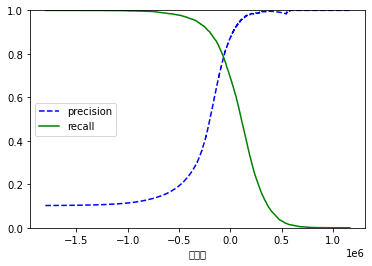

In [73]:
# 정밀도-재현율 트레이드오프
# 재현율에 대한 정밀도 곡선을 그려, 급격하게 줄어드는 하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음
y_scores = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3, method="decision_function")
# method="decision_function" 는 예측 결과가 아니라, 결정 점수를 반환받도록

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("임곗값")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

5. ROC 곡선
- 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)
- 즉, 민감도(재현율)에 대한 1-특이도 그래프

AUC : ROC 곡선의 아래 면적 (클수록 좋음)

C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\prog

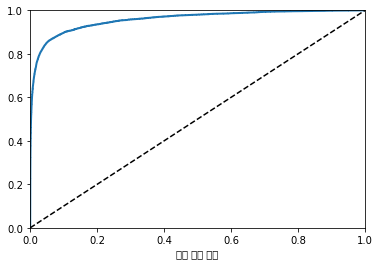

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.xlabel('진짜 양성 비율')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

0.9583390921170609

In [77]:
# RandomForestClassifier 의 ROC 곡선과 ROC AUC 점수를 SGDClassifier과 비교
# RandomForestClassifier 에는 decision_function() 메서드는 없지만 predict_proba() 메서드 있다. 
# 이는 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_3, cv=3, method="predict_proba")

C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\programs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ai\prog

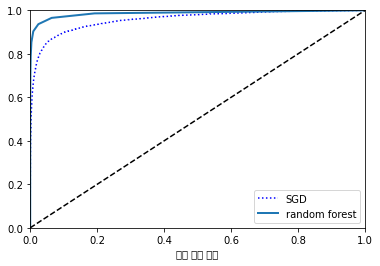

In [78]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_3, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "random forest")
plt.legend(loc="lower right")
plt.show()

In [80]:
roc_auc_score(y_train_3, y_scores_forest)

0.9866479462330007